In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#loading the dataset

In [3]:
data=pd.read_excel(r'C:\Users\sreej\Downloads\iris (2).xls')

In [4]:
data

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,NaN,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,NaN,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [5]:
data.shape

(150, 5)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              143 non-null    float64
 1   SW              144 non-null    float64
 2   PL              144 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
#checking for null values

In [8]:
data.isna().sum()

SL                7
SW                6
PL                6
PW                0
Classification    0
dtype: int64

In [9]:
#filling the missing values

In [10]:
data.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [11]:
nu_cols=data[['SL', 'SW', 'PL']]

In [12]:
nu_cols.isna().sum()

SL    7
SW    6
PL    6
dtype: int64

In [13]:
from sklearn.impute import SimpleImputer

In [14]:
imp=SimpleImputer(missing_values=np.nan,strategy='mean')
imp=imp.fit(nu_cols)
nu_cols=imp.transform(nu_cols)


In [15]:
type(nu_cols)

numpy.ndarray

In [16]:
nu_cols=pd.DataFrame(nu_cols,columns=[['SL', 'SW', 'PL']])

In [17]:
type(nu_cols)

pandas.core.frame.DataFrame

In [18]:
nu_cols.isna().sum()

SL    0
SW    0
PL    0
dtype: int64

In [19]:
data=data.drop(['SL', 'SW', 'PL'],axis=1)

In [20]:
#concatenating the data with filled columns

In [21]:
data=pd.concat([nu_cols,data],axis=1)

In [22]:
data.head()

,"(SL,)","(SW,)","(PL,)",PW,Classification
0,5.100000,3.5,1.4,0.2,Iris-setosa
1,4.900000,3.0,1.4,0.2,Iris-setosa
2,5.855944,3.2,1.3,0.2,Iris-setosa
3,4.600000,3.1,1.5,0.2,Iris-setosa
4,5.000000,3.6,1.4,0.2,Iris-setosa


In [23]:
data.isna().sum()

(SL,)             0
(SW,)             0
(PL,)             0
PW                0
Classification    0
dtype: int64

In [24]:
#Encoding the categorical data 

In [25]:
data['Classification'].nunique()

3

In [26]:
#Importing LabelEncoder for the categorical data

In [27]:
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
lab_enc=LabelEncoder()
data['Classification']=lab_enc.fit_transform(data['Classification'])

In [28]:
data

,"(SL,)","(SW,)","(PL,)",PW,Classification
0,5.100000,3.5,1.40000,0.2,0
1,4.900000,3.0,1.40000,0.2,0
2,5.855944,3.2,1.30000,0.2,0
3,4.600000,3.1,1.50000,0.2,0
4,5.000000,3.6,1.40000,0.2,0
...,...,...,...,...,...
145,6.700000,3.0,5.20000,2.3,2
146,6.300000,2.5,5.00000,1.9,2
147,6.500000,3.0,3.75625,2.0,2
148,6.200000,3.4,5.40000,2.3,2


In [29]:
#Feature Scaling

In [30]:
X=data.drop('Classification',axis=1)
y=data['Classification']

In [31]:
X

,"(SL,)","(SW,)","(PL,)",PW
0,5.100000,3.5,1.40000,0.2
1,4.900000,3.0,1.40000,0.2
2,5.855944,3.2,1.30000,0.2
3,4.600000,3.1,1.50000,0.2
4,5.000000,3.6,1.40000,0.2
...,...,...,...,...
145,6.700000,3.0,5.20000,2.3
146,6.300000,2.5,5.00000,1.9
147,6.500000,3.0,3.75625,2.0
148,6.200000,3.4,5.40000,2.3


In [32]:
#MinMaxScaling

In [33]:
from sklearn.preprocessing import MinMaxScaler


In [34]:
min_max_scaler=MinMaxScaler(feature_range=(0,1))
X=min_max_scaler.fit_transform(X)                           

C:\Users\sreej\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\sreej\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [35]:
type(X)

numpy.ndarray

In [36]:
X=pd.DataFrame(X,columns=[['SL', 'SW', 'PL', 'PW']])

In [37]:
X.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,0.432207,0.437211,0.467161,0.457778
std,0.224578,0.175785,0.292454,0.317984
min,0.000000,0.000000,0.000000,0.000000
25%,0.250000,0.333333,0.101695,0.083333
50%,0.416667,0.416667,0.542373,0.500000
75%,0.583333,0.531250,0.694915,0.708333
max,1.000000,1.000000,1.000000,1.000000


In [38]:
X=data.drop('Classification',axis=1)
y=data['Classification']

In [39]:
#Splitting the data into training and testing set

In [40]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)


# Logistic Regression Model

In [41]:
#Evaluating the Logistic Regression Model

In [42]:
from sklearn.linear_model import LogisticRegression


In [43]:
log_reg=LogisticRegression()
log_reg=log_reg.fit(X_train,y_train)
y_pred_log=log_reg.predict(X_test)

C:\Users\sreej\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\sreej\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\sreej\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.wa

In [44]:
y_pred_log

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0])

In [45]:
#Confusion Matrix

In [46]:
from sklearn.metrics import confusion_matrix

In [47]:
confusion_matrix(y_test,y_pred_log)

array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [48]:
#accuracy score

In [49]:
from sklearn.metrics import accuracy_score

In [50]:
accuracy_score(y_test,y_pred_log)

0.9736842105263158

# kNN Model

In [51]:
#Evaluating the kNN Model

In [52]:
from sklearn.neighbors import KNeighborsClassifier

In [53]:
metric_k=[]
neighbors=range(3,15)
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k)
    classifier=classifier.fit(X_train,y_train)
    y_pred_kNN=classifier.predict(X_test)
    acc=accuracy_score(y_test,y_pred_kNN)
    metric_k.append(acc)

C:\Users\sreej\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\sreej\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\sreej\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\sreej\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\sreej\anaco

In [54]:
y_pred_kNN

array([1, 0, 2, 1, 1, 0, 1, 2, 1, 1, 2, 0, 0, 0, 0, 1, 2, 1, 1, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 0, 0, 0, 0, 1, 0, 1, 2, 1, 0])

In [55]:
metric_k

[0.9473684210526315,
 0.9736842105263158,
 0.9473684210526315,
 0.9473684210526315,
 0.9473684210526315,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158,
 0.9736842105263158]

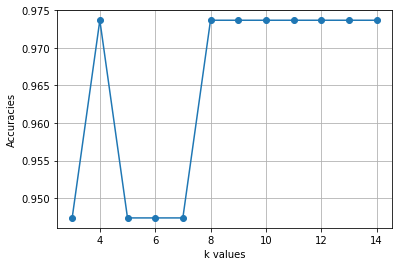

In [56]:
plt.plot(neighbors,metric_k,'o-')
plt.xlabel('k values')
plt.ylabel('Accuracies')
plt.grid()


In [57]:
#Accuracy score

In [58]:
accuracy_score(y_test,y_pred_kNN)

0.9736842105263158

In [59]:
#Confusion Matrix

In [60]:
confusion_matrix(y_test,y_pred_kNN)

array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

# SVM Model

In [61]:
#Evaluating the SVM Model

In [62]:
from sklearn.svm import SVC

# Linear kernel

In [63]:
svm_clf=SVC(kernel='linear')
svm_clf=svm_clf.fit(X_train,y_train)
y_pred_svm=svm_clf.predict(X_test)

C:\Users\sreej\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\sreej\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [64]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [65]:
#Accuracy score

In [66]:
accuracy_score(y_test,y_pred_svm)

1.0

In [67]:
#Confusion Matrix

In [68]:
confusion_matrix(y_test,y_pred_svm)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

# Rbf kernel

In [69]:
svm_clf2=SVC(kernel='rbf')
svm_clf2=svm_clf2.fit(X_train,y_train)
y_pred_svm2=svm_clf2.predict(X_test)

C:\Users\sreej\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\sreej\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [70]:
confusion_matrix(y_test,y_pred_svm2)

array([[14,  1,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [71]:
accuracy_score(y_test,y_pred_svm2)

0.9736842105263158

# Decision trees

In [72]:
from sklearn.tree import DecisionTreeClassifier

In [73]:
dt_clf=DecisionTreeClassifier()
dt_clf=dt_clf.fit(X_train,y_train)
y_pred_dt=dt_clf.predict(X_test)

C:\Users\sreej\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\sreej\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [74]:
confusion_matrix(y_test,y_pred_dt)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [75]:
accuracy_score(y_test,y_pred_dt)

1.0

# Random Forest Algorithm

In [76]:
from sklearn.ensemble import RandomForestClassifier  


In [77]:
rf_clf = RandomForestClassifier()  
rf_clf=rf_clf.fit(X_train, y_train)
y_pred_rf=rf_clf.predict(X_test)


C:\Users\sreej\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(
C:\Users\sreej\anaconda3\lib\site-packages\sklearn\utils\validation.py:1688: FutureWarning: Feature names only support names that are all strings. Got feature names with dtypes: ['str', 'tuple']. An error will be raised in 1.2.
  warnings.warn(


In [78]:
confusion_matrix(y_test,y_pred_rf)

array([[15,  0,  0],
       [ 0, 11,  0],
       [ 0,  0, 12]], dtype=int64)

In [79]:
accuracy_score(y_test,y_pred_rf)

1.0

By comparing all the Classification models,Random Forest Algorithm,Decision Trees,SVM linear Kernel are showing the accuracy score of 100% while others i.e.SVM Rbf kernel,Logistic Regression,kNN having the accuracy of 97.3%.If a model gives a 100% accuracy,it might be the result of overfitting of data.So here its better to perform the predictions with the models having 97.3% accuracy.